# Lab 2
## Using Python for Exploratory Data Analysis (EDA)

The first part of Lab2 is to go through a demo for EDA of a relatively clean tabular data called *Auto MPG data*. This data set comes from the UCI Machine Learning Data Repository (http://archive.ics.uci.edu/ml/) and can be found at http://archive.ics.uci.edu/ml/datasets/Auto+MPG. We provide a slightly modified version of this data set as file `cars.csv`.

To load this data set and pursue EDA, it is a good idea to use several popular Python packages, which come preloaded with the Anaconda software:
- pandas (http://pandas.pydata.org/) -- a library for data science
- numpy (http://www.numpy.org/) -- a library for data computations
- matplotlib (http://matplotlib.org/) -- a library for data visualization

The main feature of *pandas* is its `DataFrame` data structure that provides an intuitive way of handling tabular data. The main feature of *numpy* is its `array` data structure that represents matrices and allows us to perform matrix algebra operations. *matplotlib* allows visualizing data stored in `DataFrame` or `array` objects. 

As you will soon realize, each new Python library requires spending some time to learn about it. There are several nice tutorials that you can find on the web that get you started with the 3 libraries. A particularly great resource for learning about those libraries is your textbook *Python for Data Analysis*, so please take some time to browse its contents and try to run the code provided in it. When learning about the new libraries, you are best advised to jump in and immediatelly start tinkering with the code. The more time you spend using the library, the more you will uncover about all the great features and posibilities the library offers you.

Let us start by loading the 3 libraries in a particular way that many data scientists prefer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline  

**Question 1**: What are we accomplishing with `as` reserved word?

import statement binds the module name in the local namespace to the module object, and then goes on to import the next identifier, if any. If the module name is followed by as, the name following as is used as the local name for the module.

`cars.csv` is in an easy-to-read comma separated format and the following *pandas* functionality makes it easy to read it into a `DataFrame` object. 

In [2]:
# read this csv file, remember to put the full path to 
# the directory where you saved the data
df = pd.read_csv('cars.csv')  # df is DataFrame object
print (df.head())    # see the first 5 rows of the loaded table

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  


**Question 2**: How can you display the first 10 rows using method `head`? What are the types of each of the columns in `df`?

In [3]:
print(df.head(10))
print('\n')
print(df.dtypes) #display types of columns

                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   
5           Ford Galaxie 500  15.0          8         429.0         198   
6           Chevrolet Impala  14.0          8         454.0         220   
7          Plymouth Fury iii  14.0          8         440.0         215   
8           Pontiac Catalina  14.0          8         455.0         225   
9         AMC Ambassador DPL  15.0          8         390.0         190   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433     

There are different ways of exploring and indexing the table. Here are some examples.

In [4]:
print (list(df.columns))
print (df[0:5])         # print the first 5 rows, same outcome as df.head()
print (df[['Car', 'MPG']][:10])  # print the first 10 rows for selected columns
print (df[df['MPG'] > 40])   # using Boolean condition, print only cars with MPG > 40
print (df.iloc[[0,1,5],0:5])   # uses 'ix' indexing, selects rows and columns based on their location in the table

['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']
                         Car   MPG  Cylinders  Displacement  Horsepower  \
0  Chevrolet Chevelle Malibu  18.0          8         307.0         130   
1          Buick Skylark 320  15.0          8         350.0         165   
2         Plymouth Satellite  18.0          8         318.0         150   
3              AMC Rebel SST  16.0          8         304.0         150   
4                Ford Torino  17.0          8         302.0         140   

   Weight  Acceleration  Model Origin  
0    3504          12.0     70     US  
1    3693          11.5     70     US  
2    3436          11.0     70     US  
3    3433          12.0     70     US  
4    3449          10.5     70     US  
                         Car   MPG
0  Chevrolet Chevelle Malibu  18.0
1          Buick Skylark 320  15.0
2         Plymouth Satellite  18.0
3              AMC Rebel SST  16.0
4                Ford Torino  1

**Question 3**: Show two ways of printing the last 5 rows of `df`. Print the names of the cars with 3 cilinders.

In [5]:
print(df[-5:]) #first way
print(df.tail(5)) #second way
print('\n')
print(df[df['Cylinders'] == 3]['Car']) #cars with 3 cylinders

                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ranger  28.0          4         120.0          79    2625   
405         Chevy S-10  31.0          4         119.0          82    2720   

     Acceleration  Model  Origin  
401          15.6     82      US  
402          24.6     82  Europe  
403          11.6     82      US  
404          18.6     82      US  
405          19.4     82      US  
                   Car   MPG  Cylinders  Displacement  Horsepower  Weight  \
401    Ford Mustang GL  27.0          4         140.0          86    2790   
402  Volkswagen Pickup  44.0          4          97.0          52    2130   
403      Dodge Rampage  32.0          4         135.0          84    2295   
404        Ford Ran

Now, we are ready to start plotting the data.

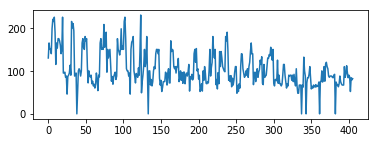

In [6]:
plt.figure(figsize=(6,2))  # can control the size of the display
plt.plot(df['Horsepower'])      # display 'Model' attribute

**Question 4**: Plot *Horsepower* attribute, but only for the US cars. 

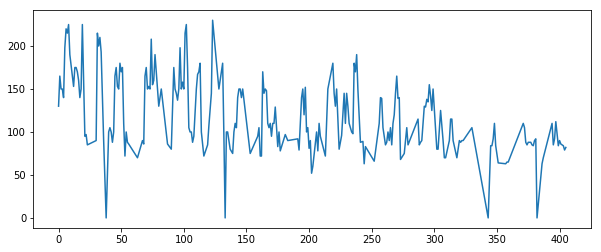

In [7]:
data_power = df[df['Origin'] == 'US']
plt.figure(figsize = (10,4))
plt.plot(data_power['Horsepower'])

To plot the histogram of a selected attribute:

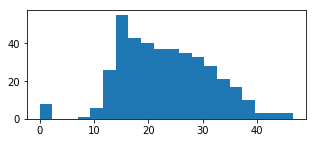

In [8]:
fig = plt.figure(figsize=(5,2))
plt.hist(df['MPG'], bins=20);   # ; suppresses Out
# plt.hist(df['Cylinders'], bins=20) 

**Question 5**: What can we conclude by looking at the histogram? Explain in one-two sentences. Figure out what is your preferred number of bins for *MPG* and *Cylinders* and argue why. 

Most cars have MPG around 15 and above. Only a few cars have lower than 10 MPG. After the highest MPG threshold, as MPG increases, number of cars in each bin decreases.

46.6
0.0


(array([   4.,  207.,    3.,   84.,  108.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 5 Patch objects>)

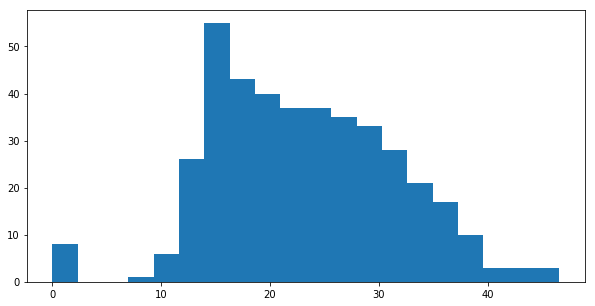

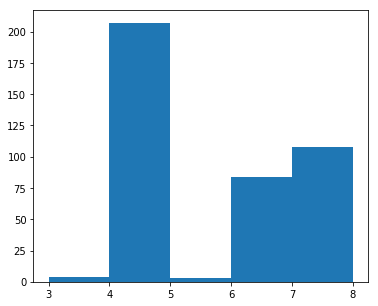

In [9]:
print(df['MPG'].max())
print(df['MPG'].min())
mpgplot = plt.figure(figsize = (10,5))
plt.hist(df['MPG'], bins = 20) 
#the range of MPG is (0,46.6), so the number of bins should be around 20 so that one bin allows for a difference of 2-3 MPG. 
cylplt = plt.figure(figsize = (6,5))
numbin = df['Cylinders'].nunique()
plt.hist(df['Cylinders'], bins = numbin) #let the number of bins to equal the number of types of Cylinders. 

The following code provides statistics for number of cylinders.

In [10]:
t = pd.crosstab(index=df["Cylinders"],  # Make a crosstab
                     columns="count")     # Name the count column
t['percentage']= (t/t.sum())*100
print (t)

col_0      count  percentage
Cylinders                   
3              4    0.985222
4            207   50.985222
5              3    0.738916
6             84   20.689655
8            108   26.600985


**Question 6**: Try to learn more about `crosstab` method (by doing Google search) and write a line of code that uses it in a different way on `df` data.

In [11]:
origindf = pd.crosstab(index = [df['Origin'], df['Cylinders']], columns = 'count')
origindf['percentage'] = (origindf/origindf.sum()) * 100
print(origindf)

col_0             count  percentage
Origin Cylinders                   
Europe 4             66   16.256158
       5              3    0.738916
       6              4    0.985222
Japan  3              4    0.985222
       4             69   16.995074
       6              6    1.477833
US     4             72   17.733990
       6             74   18.226601
       8            108   26.600985


Horizontal bar plot:

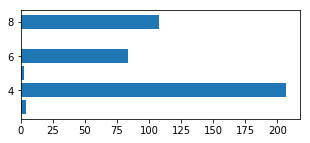

In [12]:
plt.figure(figsize=(5,2))
plt.barh(t.index,t["count"]);

**Question 7**: How about a horizontal bar plot? Can you learn how to control the width of bars and make a plot that has thinner bars?

<Container object of 5 artists>

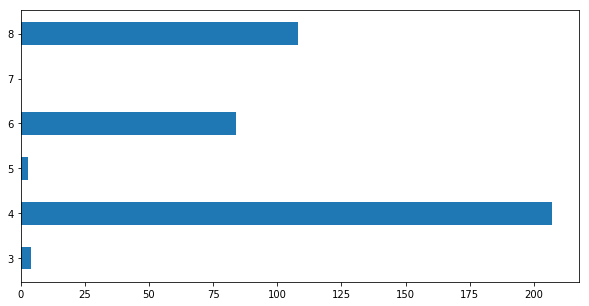

In [13]:
plt.figure(figsize = (10,5))
plt.barh(t.index, t['count'], height = 0.5) #use the parameter height to make a plot that has thinner bars. 

Pie chart:

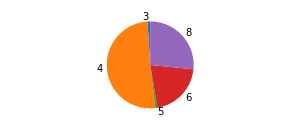

In [14]:
plt.figure(figsize=(5,2))
plt.axis("equal")
plt.pie(t["count"],labels=t.index,startangle=90);

**Question 8**: Do you prefer bar or pie displayed chart and why?

I prefer bar chart because with the bar chart we can see clearly how many cars are in each group of cylinder, and thus it is easier to compare differences between each group of cylinders. In pie chart, we can only see which group of cylinder have more cars than others, but still that doesn't tell us how much the difference is. In the bar chart, it is clear that the number of cars with 4 cylinders is about twice as many as the number of cars with 8 cylinders

The following is a boxplot of MPG values for each of the model years. Pay attention that matplotlib is not used here. Instead, we called a panda `boxplot` method 

C:\Users\Hoang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


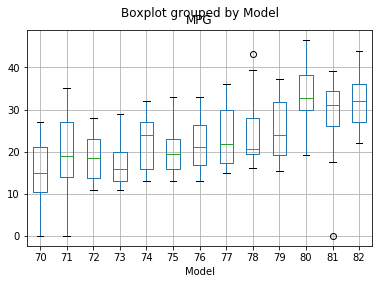

In [15]:
df.boxplot(column='MPG',by='Model');

**Question 9**: Discuss what can you learn from the displayed boxplot. Plot another boxplot using `df` data that you think is very useful and explain what can we learn from it?

With boxplot we can learn get the attribute's range of value, maximum (that is not an outlier), minimum value (that is not an outlier), the mean, the first and the third quantile and the outliers. In particular, for the graph above, for each of the model, we can know what is the range of MPG excluding the outliers, the 1st and 3rd quantile and the mean value. In the graph above, we can learn that MPG increases as the time went by

C:\Users\Hoang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


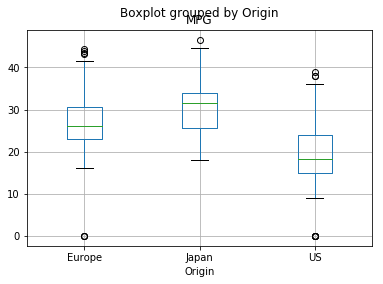

In [16]:
df.boxplot(column = 'MPG', by = 'Origin')

From the above graph we can see that, US cars' MPG range is lower than that of European cars and Japanese cars: lower maximum value, lower minimum value and lower mean. 

Scatterplot between MPG and Weight attributes:

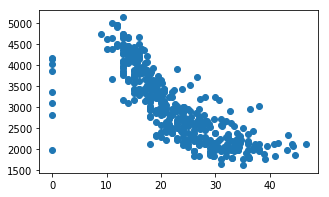

In [17]:
plt.figure(figsize=(5,3))
plt.scatter(df['MPG'],df['Weight']);

**Question 10**: Discuss what can we learn from the displayed scatterplot.  

With a scatterplot we can learn the relationship between two attributes. In the above example, mpg is negatively related to weight, but the relationship between the two attributes seem to be non-linear. 

We can decide on the size and collor of circles to represent some of data properties. Here, the size is proportional to Cylinders and color is related to Horsepower:

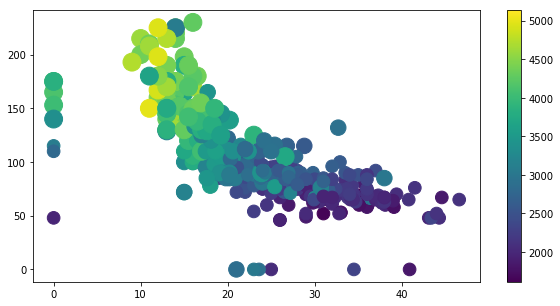

In [54]:
plt.figure(figsize=(10,5))
plt.scatter(df['MPG'],df['Horsepower'],df['Cylinders']*40,df['Weight']);
plt.colorbar()

**Question 11**: Discuss what additional insight we can get from this scatterplot as compared to the previous scatterplot. Plot another scatterplot by picking a different set of attributes that you think is providing a useful view at the data. Discuss what can be concluded from that plot.

With the new plot, we can also obtain relationship between MPG, weight, cylinders and horsepower. In particular, cars with higher MPG have lower weights, fewer cylinders and lower horsepower.

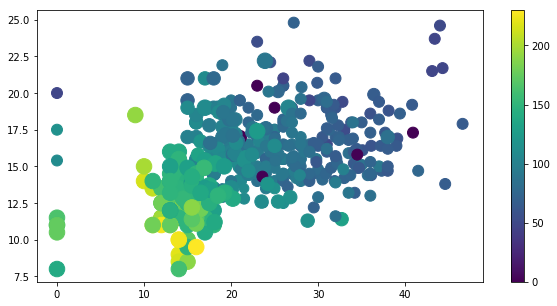

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df['MPG'], df['Acceleration'], df['Cylinders'] * 30, df['Horsepower'])
plt.colorbar()

Cars with higher MPG have lower horsepower, fewer cylinders and somewhat higher acceleration. But the relationship between MPG and acceleration is not so clear: the relationship is non-linear, but cars with lower MPG are also ones with lower acceleration and vice versa. Combine with previous results, we can conclude that cars with higher MPG have lower horsepower, lower weight, fewer cylinders and somewhat higher acceleration

In [20]:
#we want to get the correlation coefficients between MPG and other attributes to confirm what we have just said
print(np.corrcoef(df[['MPG', 'Acceleration']].T))
print(np.corrcoef(df[['MPG', 'Weight']].T))
print(np.corrcoef(df[['MPG', 'Horsepower']].T))
print(np.corrcoef(df[['MPG', 'Cylinders']].T))

[[ 1.          0.42449011]
 [ 0.42449011  1.        ]]
[[ 1.         -0.78750994]
 [-0.78750994  1.        ]]
[[ 1.        -0.7266702]
 [-0.7266702  1.       ]]
[[ 1.         -0.73556266]
 [-0.73556266  1.        ]]


Pandas `scatter_matrix` method allows us to plot all scatterplots for a data set (it would take a few seconds to display):

C:\Users\Hoang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


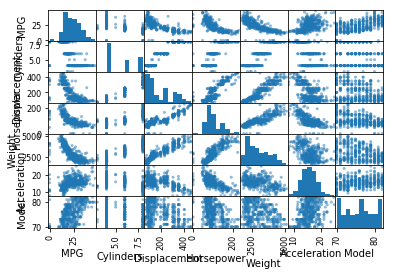

In [21]:
pd.scatter_matrix(df);

In [22]:
df.groupby(['Origin', 'Model'])['MPG', 'Acceleration', 'Weight', 'Horsepower'].mean()

MPG  Acceleration       Weight  Horsepower
Origin Model                                                  
Europe 70     21.000000     16.666667  2439.333333   91.000000
       71     23.000000     17.400000  2014.800000   68.800000
       72     22.000000     18.700000  2573.200000   79.600000
       73     24.000000     16.428571  2335.714286   81.857143
       74     27.000000     15.333333  2139.333333   74.166667
       75     24.500000     15.083333  2571.166667   89.500000
       76     24.250000     16.050000  2611.000000   87.625000
       77     29.250000     15.000000  2138.750000   81.000000
       78     24.950000     16.233333  2691.666667   99.166667
       79     30.450000     18.400000  2693.750000   72.000000
       80     37.288889     18.366667  2348.000000   59.333333
       81     25.260000     17.080000  2740.000000   68.000000
       82     40.000000     19.950000  2055.000000   63.000000
Japan  70     25.500000     14.750000  2251.000000   91.500000
       71     29.500000     16.375000  1936.000000   79.250000
       72     24.200000     15.400000  2300.400000   93.800000
       73     20.000000     15.625000  2397.250000   98.500000
       74     29.333333     17.666667  2053.000000   72.500000
       75     27.500000     16.000000  2303.250000   80.250000
       76     28.000000     16.575000  2217.500000   76.500000
       77     27.416667     16.316667  2295.833333   81.166667
       78     29.687500     16.200000  2221.250000   79.250000
       79     32.950000     17.200000  1997.500000   65.000000
       80     35.400000     16.015385  2290.307692   78.846154
       81     32.958333     16.183333  2269.166667   78.333333
       82     34.888889     15.833333  2132.777778   74.000000
US     70     12.444444     11.685185  3752.148148  165.962963
       71     18.100000     14.575000  3401.600000  113.850000
       72     16.277778     14.055556  3682.666667  138.777778
       73     15.034483     13.620690  3821.448276  146.620690
       74     18.333333     15.966667  3503.333333  104.666667
       75     17.550000     16.350000  3533.200000  108.700000
       76     19.431818     15.786364  3405.409091  110.500000
       77     20.722222     15.238889  3422.000000  118.388889
       78     21.772727     15.545455  3141.136364  107.272727
       79     23.478261     15.243478  3210.217391  109.434783
       80     25.914286     16.800000  2822.428571   76.142857
       81     27.530769     16.053846  2695.000000   84.538462
       82     29.450000     16.670000  2637.750000   82.600000

In [23]:
df.groupby(['Origin', 'Cylinders'])['MPG','Acceleration', 'Horsepower', 'Weight'].mean()

MPG  Acceleration  Horsepower       Weight
Origin Cylinders                                                  
Europe 4          27.119697     16.763636   76.515152  2343.318182
       5          27.366667     18.633333   82.333333  3103.333333
       6          20.100000     16.425000  113.500000  3382.500000
Japan  3          20.550000     13.250000   99.250000  2398.500000
       4          31.595652     16.569565   75.579710  2153.492754
       6          23.883333     13.550000  115.833333  2882.000000
US     4          27.840278     16.526389   77.583333  2437.166667
       6          19.663514     16.474324   98.324324  3213.905405
       8          14.270370     12.837037  158.453704  4105.194444

In [24]:
print(pd.crosstab(df['Model'], [df['Origin'], df['Cylinders']]))

Origin    Europe       Japan         US        
Cylinders      4  5  6     3   4  6   4   6   8
Model                                          
70             6  0  0     0   2  0   0   4  23
71             5  0  0     0   4  0   5   8   7
72             5  0  0     1   4  0   5   0  13
73             7  0  0     1   2  1   2   7  20
74             6  0  0     0   6  0   3   7   5
75             6  0  0     0   4  0   2  12   6
76             7  0  1     0   3  1   5   8   9
77             4  0  0     1   4  1   6   4   8
78             3  1  2     0   8  0   6  10   6
79             3  1  0     0   2  0   7   6  10
80             8  1  0     1  11  1   6   1   0
81             4  0  1     0  10  2   8   4   1
82             2  0  0     0   9  0  17   3   0


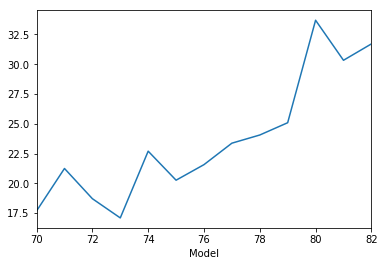

In [38]:
se = df[df['MPG'] != 0].groupby('Model')['MPG'].mean()
se.plot(x = 'Model', y = 'MPG')

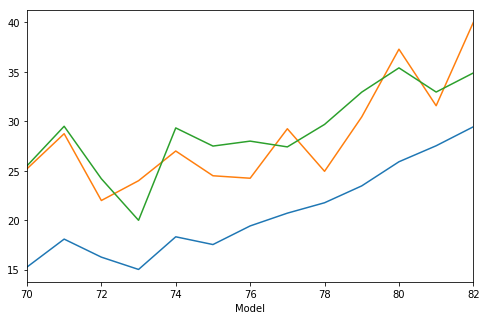

In [51]:
df1 = df[df['MPG'] != 0].groupby(['Origin', 'Model'])['MPG'].mean()
plt.figure(figsize=(8,5))
df1.xs('US').plot()
df1.xs('Europe').plot()
df1.xs('Japan').plot()

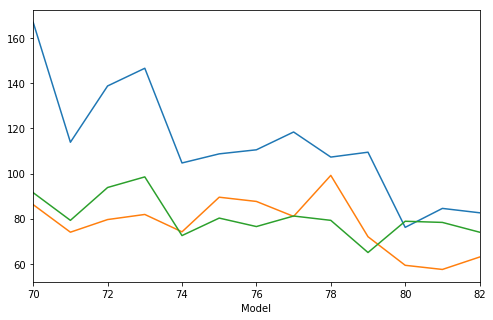

In [52]:
df1 = df[df['MPG'] != 0].groupby(['Origin', 'Model'])['Horsepower'].mean()
plt.figure(figsize=(8,5))
df1.xs('US').plot()
df1.xs('Europe').plot()
df1.xs('Japan').plot()

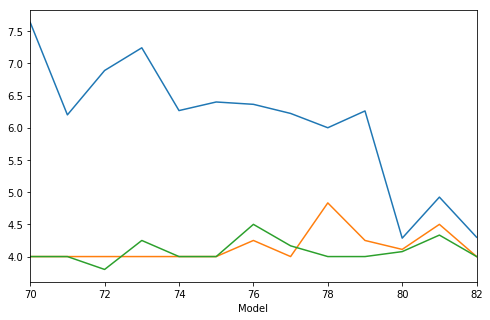

In [58]:
df1 = df[df['MPG'] != 0].groupby(['Origin', 'Model'])['Cylinders'].mean()
plt.figure(figsize=(8,5))
df1.xs('US').plot()
df1.xs('Europe').plot()
df1.xs('Japan').plot()

**Question 12**: Explain what are we seeing from this plot and discuss about the insights you obtained from it.

When you are done with running and playing with the code provided in this file and answering Questions 1-12, **submit** `.ipynb` file containing modifications of this file together with your answers and comments. Feel free to modify the provided code or produce new lines of code.

**Question 13**: Produce a 2 page word document titled "Exploratory Analysis of MPG Data Set". In this document you should combine your own discussion and figures produced by Python to provide a coherent story about the properties of the MPG data set and the most important and interesting insights about the data. You can feel free to frame your story around some known historical facts about the cars and U.S. and World economy during the 1970-1982 period. **Submit** the document as `.pdf` file.